## Task
1. see how many such game sentences with AtLocation we can create, and how many answers they have on average (the example above has 3 answers).  Also, inspect their quality and if you detect problems, see how they can be addressed.
2. Think and investigate how other relations can be used to create related tasks. I think some should be possible, like UsedFor in this example: "I want to cut paper so I will need knife or scissors". You don't need to think about all relations but take some subset of let's say 10 that seem promising.
3. Take the 50 household items from EQA that we worked with, and generate random walks of length 2 and 3 on the graph starting with them. Example for a random walk of length 2 is: toaster-LocatedAt-kitchen-UsedFor-cooking. You could do this with graph-tools for example (https://graph-tool.skewed.de/static/doc/quickstart.html)
4. Think and investigate how can we generate game sentences with these walks, and whether it makes sense. One option would be to do something like "A toaster can be located in a place that is used for cooking and baking."  Even if we can do this for a small set of patterns, it would be useful. The solution could also use disambiguation or other NLP tricks. 
5. It would be useful to see some examples where we can use these walks to create sentences. You don't need to code this last part 5.

In [1]:
import matplotlib.pyplot as plt
from graph_tool.all import *
import random

## Set up Folder

In [87]:
# input
cskg_dim_folder="./data/cskg_dim/cskg_dim.tsv"

# output
AtLocation_sents_file="./data/psl/AtLocation_sents.txt"
gamesents_file="./data/psl/gamesents.txt"

## Function

In [3]:
def load_source(filename):
    with open(filename,"r",encoding="utf-8") as f:
        head=f.readline().strip().split("\t")
        data=[]
        for line in f:
            temp=line.strip().split("\t")
            data.append([item.split("|")[0] for item in temp])
            
    return head, data

def data_filter(head, lines, filter_={"relation":["/r/AtLocation"]}):
    # filter the lines woth limitation
    for head_name in filter_:
        filter_values=filter_[head_name]
        line_index=head.index(head_name)
        
        for filter_value in filter_values:
            filter_lines=[]
            for line in lines:
                if line[line_index]==filter_value:
                    filter_lines.append(line)
            yield filter_value,filter_lines
        
def build_sentence(lines, sent_format='f"I am going to {blank1} and I am going to see {blank2}"',operation="or",reverse_format=False):
    # build dictionary structure
    top_bot=dict()
    if not reverse_format:
        for line in lines:
            subject_id=line[1]
            subject_label=line[4]

            object_id=line[3]
            object_label=line[5]

            temp=top_bot.get(object_label,[])
            temp.append(subject_label)

            top_bot[object_label]=temp
            
    else:
        for line in lines:
            subject_id=line[1]
            subject_label=line[4]

            object_id=line[3]
            object_label=line[5]

            temp=top_bot.get(subject_label,[])
            temp.append(object_label)

            top_bot[subject_label]=temp
    
    # build sentence
    sents=[]
    for top in top_bot:
        bots=top_bot[top]
        
        blank1=top
        blank2=f" {operation} ".join(bots)
        sents.append(eval(sent_format).replace("_"," "))
        
    return sents, top_bot

In [4]:
cskg_dim_head,cskg_dim_lines=load_source(cskg_dim_folder)

In [5]:
# head
cskg_dim_head

['id',
 'node1',
 'relation',
 'node2',
 'node1;label',
 'node2;label',
 'relation;label',
 'relation;dimension',
 'source',
 'sentence']

In [6]:
# example of lines
cskg_dim_lines[0]

['/c/en/0-/r/DefinedAs-/c/en/empty_set-0000',
 '/c/en/0',
 '/r/DefinedAs',
 '/c/en/empty_set',
 '0',
 'empty set',
 'defined as',
 'similarity',
 'CN',
 '[[0]] is the [[empty set]].']

## AtLocation Sentence

In [7]:
mul_filter_lines=list(data_filter(cskg_dim_head, cskg_dim_lines, filter_={"relation":["/r/AtLocation"]}))

In [8]:
mul_filter_lines[0][1][0]

['/c/en/00t_shirts-/r/AtLocation-/c/en/drawer-0000',
 '/c/en/00t_shirts',
 '/r/AtLocation',
 '/c/en/drawer',
 '00t shirts',
 'drawer',
 'at location',
 'spatial',
 'CN',
 '*Something you find in [[a drawer]] is [[00t-shirts]]']

In [9]:
AtLocation_sents,AtLocation_dict = build_sentence(mul_filter_lines[0][1])
print("game sentences with AtLocation we can create:",len(AtLocation_dict))

# statistic of location sentence
example_distribution=[len(AtLocation_dict[item]) for item in AtLocation_dict]
avg_example= sum(example_distribution)/len(AtLocation_dict)
print("answers they have on average:", avg_example)

game sentences with AtLocation we can create: 7771
answers they have on average: 3.5770171149144256


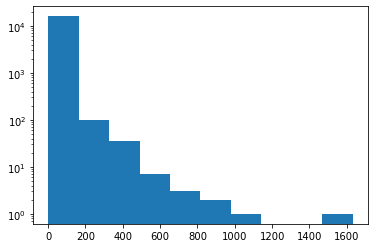

In [92]:
a=plt.hist(example_distribution,log=True)

In [11]:
# save file into desk
with open(AtLocation_sents_file,"w",encoding="utf-8") as f:
    for line in AtLocation_sents:
        f.write(line+"\n")

## More Sentences

In [12]:
# check the distribution of relation id
rel_dict=dict()
for line in cskg_dim_lines:
    rel_dict[line[2]]=rel_dict.get(line[2],0)+1
    
print("number of relation id:", len(rel_dict))

number of relation id: 47


In [13]:
rel_dict

{'/r/DefinedAs': 2173,
 '/r/HasContext': 238277,
 '/r/HasProperty': 9482,
 '/r/IsA': 316351,
 '/r/RelatedTo': 1703968,
 '/r/SimilarTo': 30635,
 '/r/Antonym': 401003,
 '/r/Synonym': 1245289,
 '/r/FormOf': 378859,
 '/r/AtLocation': 27797,
 '/r/DerivedFrom': 325914,
 '/r/EtymologicallyRelatedTo': 32075,
 '/r/CapableOf': 42375,
 '/r/InstanceOf': 1480,
 '/r/PartOf': 31964,
 '/r/MadeOf': 2757,
 '/r/ReceivesAction': 6037,
 '/r/HasA': 16973,
 '/r/UsedFor': 42580,
 '/r/NotHasProperty': 327,
 '/r/CausesDesire': 4688,
 '/r/HasSubevent': 25369,
 '/r/LocatedNear': 152274,
 '/r/DistinctFrom': 8249,
 '/r/MannerOf': 12618,
 '/r/Entails': 405,
 '/r/HasPrerequisite': 24977,
 '/r/NotCapableOf': 329,
 '/r/MotivatedByGoal': 9489,
 '/r/Desires': 3170,
 '/r/Causes': 17388,
 '/r/HasFirstSubevent': 3347,
 '/r/HasLastSubevent': 2874,
 '/r/NotDesires': 2886,
 '/r/CreatedBy': 450,
 '/r/EtymologicallyDerivedFrom': 71,
 '/r/SymbolOf': 4,
 'at:xAttr': 133281,
 'at:xEffect': 100307,
 'at:xIntent': 57685,
 'at:xReact'

In [89]:
#define the first word and second word used for build sentence:
# example:
# [I am going to], [and I am going to see]
relation_sentence={"/r/UsedFor":['f"I want to {blank1} so I will need {blank2}"',"or",False],
                   "/r/CreatedBy":['f"I want to have {blank1} and I need to create it by {blank2}"',"or", True],
                   "/r/CapableOf":['f"I have {blank1} so I am capable of {blank2}"',"and", True],
                   "/r/Causes":['f"I have {blank1} so I will cause {blank2}"',"or", True],
                   "/r/PartOf":['f"I have {blank1} so I might also have {blank2}"',"or", False],
                   "/r/HasContext":['f"I have {blank1} so I might also have {blank2}"',"or", True],
                   "/r/MadeOf":['f"I want to have {blank1} so I can make it by {blank2}"',"and", True],
                   "/r/HasPrerequisite":['f"If I want to {blank1} then I should {blank2}"',"and", True],
                   "/r/CausesDesire":['f"I want to {blank1} then I might have {blank2}"',"or", False],
                   "/r/NotDesires":['f"I have {blank1} and I doesn\'t want to {blank2}"',"or", True],
                   "/r/AtLocation":['f"I am going to {blank1} and I am going to see {blank2}"',"or", True],
                   '/r/LocatedNear':['f"I am going to {blank1} and I am going to see {blank2} nearby"',"or", True]}

mul_filter_lines=list(data_filter(cskg_dim_head, cskg_dim_lines, filter_={"relation":relation_sentence.keys()}))
sents_example=[]

with open(gamesents_file,"w",encoding="utf-8") as f:
    for rel_id, lines in mul_filter_lines:
        sents,example_dict = build_sentence(lines,
                             sent_format=relation_sentence[rel_id][0],
                             operation=relation_sentence[rel_id][1],
                             reverse_format=relation_sentence[rel_id][2],)
        print("relation id:",rel_id)
        print("game sentences we can create:",len(sents))
        example_distribution=[len(example_dict[item]) for item in example_dict]
        avg_example= sum(example_distribution)/len(example_dict)
        print("answers they have on average:", avg_example)
        print("example of sentences:",sents[250])
        print()

        sents_example.append([rel_id,sents,example_dict])

        # save file into desk

        f.write("**"+rel_id+"**\n")
        for line in sents:
            f.write(line+"\n")

relation id: /r/UsedFor
game sentences we can create: 30174
answers they have on average: 1.411148671041294
example of sentences: I want to finance television programs so I will need advertisements

relation id: /r/CreatedBy
game sentences we can create: 370
answers they have on average: 1.2162162162162162
example of sentences: I want to have printed circuit board and I need to create it by printed circuit board milling

relation id: /r/CapableOf
game sentences we can create: 11488
answers they have on average: 3.6886316155988856
example of sentences: I have all mammals and birds so I am capable of reason analogically and reason causally

relation id: /r/Causes
game sentences we can create: 1980
answers they have on average: 8.781818181818181
example of sentences: I have committing perjury so I will cause arrest or bab juju or could go to prison or crime or criminal prosecution or embarrassment or felony prosecution or getting jailtime or go to jail or go to prison or going to jail or 

## Build Graph

In [78]:
def add2graph(graph, rel_id, subject_, object_,rel_set=relation_sentence):
    temp = graph_tool.util.find_vertex(g, g.vp["position"], subject_)
    if not temp:
        a = graph.add_vertex()
        g.vp["position"][a]=subject_
    else:
        a=temp[0]
        
    temp = graph_tool.util.find_vertex(g, g.vp["position"], object_)
    if not temp:
        b = graph.add_vertex()
        g.vp["position"][b]=object_
    else:
        b=temp[0]
        
    edge_loc=graph_tool.util.find_edge(g, g.ep["position"], rel_id)
    if not edge_loc:
        reverse=relation_sentence[rel_id][2]
        
        if reverse==True:
            c = graph.add_edge(a, b)
            g.ep["position"][c]=rel_id.split("/")[-1].split(":")[-1]
        else:
            c = graph.add_edge(b, a)
            g.ep["position"][c]=rel_id.split("/")[-1].split(":")[-1]
    else:
        c = edge_loc[0]
        
    return

def random_walk(num=2):
    step=0
    
    process=[]
    root=None
    
    while step<num:
        if root == None:
            root = graph_tool.util.find_vertex(g, g.vp["position"], random.sample(label_limit, 1)[0])
            #print(root)
            if root:
                root = root[0]
            else:
                root=None
                continue
        else:
            #print(list(root.out_neighbors()))
            root= random.sample(list(root.out_neighbors()), 1)[0]
            #print("second root", root)
        
        if root.out_degree()==0:
            step=0
            process=[]
            root=None
            continue
        
        #print(root,root.out_degree())
        process.append(root)
        step+=1
    
    process.append(random.sample(list(root.out_neighbors()), 1)[0])    
    return process

def walk_sent(process):
    sent=""
    for p2 in range(1, len(process)):
        p1=p2-1
        subject_loc=process[p1]
        object_loc=process[p2]
        
        subject_=g.vp["position"][subject_loc].replace(" ","_")
        object_=g.vp["position"][object_loc].replace(" ","_")
        relation_=g.ep["position"][g.edge(subject_loc,object_loc)]
        
        if sent:
            sent+="-"+relation_+"-"+object_
        else:
            sent=subject_+"-"+relation_+"-"+object_
            
    return sent

def walk2gamesents(sent, relation2label):
    sent_token=sent.split("-")
    gamesent=""
    i=0
    while i < len(sent_token):
        if i==0:
            gamesent+=sent_token[i].replace("_"," ")
        
        elif i==1:
            gamesent+=" "+relation2label[sent_token[i]]
            
        elif (i+1)%2==0:
            gamesent+=" "+ "that"+" "+relation2label[sent_token[i]]
        
        else:
            gamesent+= " "+sent_token[i].replace("_"," ")
        i+=1
    return gamesent

In [79]:
relation2label={"UsedFor":"is used for","CreatedBy":"is created by","CapableOf":"is capable of",
                "Causes":"casuses","PartOf":"is part of","HasContext":'has context,',"MadeOf":"is made of",
                "HasPrerequisite":"has prerequisite,","CausesDesire": "causes desire,","NotDesires":" does not desire",
                "AtLocation":"can be located in","LocatedNear":"can be located near in"}

In [80]:
label_limit = set(["rug","piano","dryer","computer","fireplace","whiteboard","bookshelf","wardrobe cabinet",
                  "pan","toilet","plates","ottoman","fish tank","dishwasher","microwave","water dispenser",
                  "bed","table","mirror","tv stand","stereo set","chessboard","playstation","vacuum cleaner",
                  "cup","xbox","heater","bathtub","shoe rack","range oven","refrigerator","coffee machine",
                  "sink","sofa","kettle","dresser","knife rack","towel rack","loudspeaker","utensil holder",
                  "desk","vase","shower","washer","fruit bowl","television","dressing table","cutting board",
                  "ironing board","food processor"])

In [81]:
g = Graph()
edge_labels = g.new_edge_property("string")
vertex_labels = g.new_vertex_property("string")

g.vertex_properties["position"] = vertex_labels
g.edge_properties["position"] = edge_labels

for item in sents_example:
    relation_id,sents,example_dict=item
    
    for key_ in example_dict:
        for value_ in example_dict[key_]:
            if key_ in label_limit or value_ in label_limit:
                add2graph(g, relation_id, key_, value_)

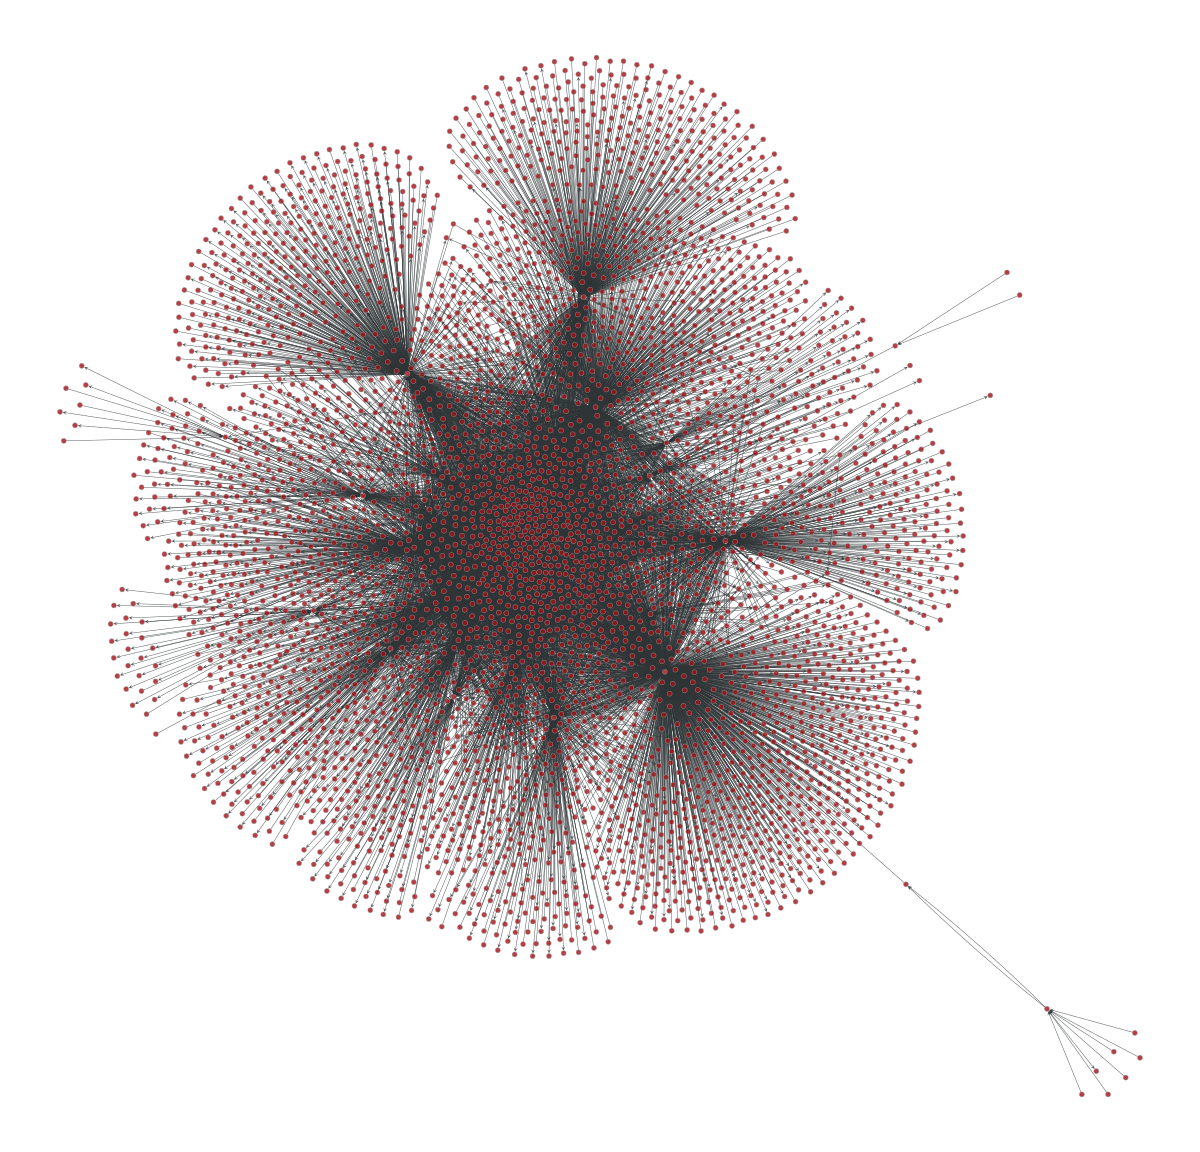

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f04f47c94a8, at 0x7f04f489bba8>

In [82]:
graph_draw(g)

In [83]:
temp=random_walk(num=3)
sent=walk_sent(temp)
sent

'television-CapableOf-console-LocatedNear-microwave-LocatedNear-steel'

In [84]:
walk2gamesents(sent, relation2label)

'television is capable of console that can be located near in microwave that can be located near in steel'

In [85]:
#show 10 example
for i in range(10):
    temp=random_walk(num=3)
    sent=walk_sent(temp)
    gamesent=walk2gamesents(sent, relation2label)
    print("random walk: ", sent)
    print("gamesentence is: ", gamesent)
    print()

random walk:  plates-AtLocation-cabinet-LocatedNear-mirror-LocatedNear-rear_view
gamesentence is:  plates can be located in cabinet that can be located near in mirror that can be located near in rear view

random walk:  bathtub-LocatedNear-vases-LocatedNear-table-LocatedNear-monitor
gamesentence is:  bathtub can be located near in vases that can be located near in table that can be located near in monitor

random walk:  vase-LocatedNear-stem-LocatedNear-mirror-LocatedNear-clouds
gamesentence is:  vase can be located near in stem that can be located near in mirror that can be located near in clouds

random walk:  television-LocatedNear-button-LocatedNear-desk-AtLocation-library
gamesentence is:  television can be located near in button that can be located near in desk that can be located in library

random walk:  bookshelf-LocatedNear-mattress-PartOf-bed-LocatedNear-baby
gamesentence is:  bookshelf can be located near in mattress that is part of bed that can be located near in baby

ran

In [86]:
#show 10 example
for i in range(10):
    temp=random_walk(num=2)
    sent=walk_sent(temp)
    gamesent=walk2gamesents(sent, relation2label)
    print("random walk: ", sent)
    print("gamesentence is: ", gamesent)
    print()

random walk:  cutting_board-LocatedNear-tablecloth-LocatedNear-desk
gamesentence is:  cutting board can be located near in tablecloth that can be located near in desk

random walk:  playstation-HasContext-video_games-LocatedNear-bookshelf
gamesentence is:  playstation has context, video games that can be located near in bookshelf

random walk:  playstation-HasContext-video_games-LocatedNear-bookshelf
gamesentence is:  playstation has context, video games that can be located near in bookshelf

random walk:  dishwasher-LocatedNear-knob-AtLocation-television
gamesentence is:  dishwasher can be located near in knob that can be located in television

random walk:  playstation-HasContext-video_games-LocatedNear-bookshelf
gamesentence is:  playstation has context, video games that can be located near in bookshelf

random walk:  xbox-HasContext-video_games-LocatedNear-bookshelf
gamesentence is:  xbox has context, video games that can be located near in bookshelf

random walk:  mirror-CapableOf

In [ ]:
/c/en/setting_cup_on_table
-/r/HasPrerequisite